In [73]:
import json
import os
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import tarfile
import pickle
import numpy as np
from tqdm import tqdm
import cv2

path = "tsinghuaDaimlerDataset"

In [67]:
#extract images or labels
# open file
file = tarfile.open('tsinghuaDaimlerDataset/tdcb_leftImg8bit_train.tar.gz')
# extracting file
file.extractall('tsinghuaDaimlerDataset/images_full/test/')
file.close()

KeyboardInterrupt: 

In [69]:
# create bbox from label
def create_bbox(path) : 
    for _, _, fnames in sorted(os.walk(path+"/label/labelData/train/tsinghuaDaimlerDataset/")): #for each folder
        for fname in fnames[1500:2000] :
            with open("tsinghuaDaimlerDataset/label/labelData/train/tsinghuaDaimlerDataset/"+fname) as json_file:
                im = json.load(json_file)
            bbox = {"y": im["children"][0]["minrow"], "x": im["children"][0]["mincol"], "w": (im["children"][0]["maxcol"]), "h": im["children"][0]["maxrow"]}
            with open(path +"/images_aligned/bbox/test/"+ os.path.splitext(im["imagename"])[0]+".json", "w") as outfile:
                json.dump(bbox, outfile)
create_bbox(path)

In [70]:
#crop image and modify bbox
from PIL import Image
for _, _, fnames in sorted(os.walk(path + "/images_full/test/")): #for each folder
    for fname in fnames :
        AB = Image.open("tsinghuaDaimlerDataset/images_full/test/"+ fname).convert('RGB')
        #AB = cv2.imread("tsinghuaDaimlerDataset/images_full/train/"+fname,1)
        width, height = AB.size
        left = int((width - height) / 2)
        right = left + height
        im1 = AB.crop((left, 0, right, height))

        im1.save("tsinghuaDaimlerDataset/images_full_crop/test/"+ fname)

        with open("tsinghuaDaimlerDataset/images_aligned/bbox/test/"+ os.path.splitext(fname)[0] + ".json" ) as json_file:
            bbox = json.load(json_file)

        bbox2 = {"y": bbox["y"], "x": bbox["x"]-left, "w": bbox["w"]-left, "h": bbox["h"]}
        if bbox2["x"]>= 1024 and bbox2["w"] >= 1024 :
            bbox2["x"] = 1024
            bbox2["w"] = 1024 
        if bbox2["x"]<= 1024 and bbox2["w"] > 1024 :
            bbox2["w"] = 1024 
        if bbox2["x"] <0 :
            bbox2["x"] =0
        if bbox2["w"] <0 :
            bbox2["w"] =0
        with open("tsinghuaDaimlerDataset/images_aligned_crop/bbox/test/"+ os.path.splitext(fname)[0] +".json", "w") as outfile:
            json.dump(bbox2, outfile)

In [72]:
#select only cyclist large enought
for _, _, fnames in sorted(os.walk(path + "/images_aligned_crop/images/test/")): #for each folder
    for fname in fnames[0:1000]:

        with open("tsinghuaDaimlerDataset/images_aligned_crop/bbox/test/"+ os.path.splitext(fname)[0] + ".json" ) as json_file:
            bbox = json.load(json_file)
        h = 512
        w_total = 512*2
        size_y = 1024
        size_x = 1024 *2
        size_bbox = [int(bbox["h"]*h/size_y)-int(bbox["y"]*h/size_y), int(bbox["w"]*w_total/size_x)-int(bbox["x"]*w_total/size_x)] 

        if size_bbox[0]<48 or size_bbox[1]<48 :
            print(size_bbox)
            os.remove("tsinghuaDaimlerDataset/images_aligned_crop/bbox/test/"+ os.path.splitext(fname)[0] + ".json")
            os.remove(path + "/images_aligned_crop/images/test/"+ fname)



[51, 17]
[51, 18]
[62, 22]
[66, 26]
[38, 15]
[39, 15]
[40, 16]
[41, 16]
[40, 16]
[40, 15]
[40, 14]
[41, 16]
[43, 17]
[49, 18]
[52, 20]
[57, 23]
[63, 25]
[69, 25]
[78, 29]
[102, 21]
[122, 0]
[63, 0]
[95, 23]
[263, 0]
[288, 0]
[31, 13]
[34, 12]
[44, 17]
[49, 21]
[55, 21]
[62, 25]
[42, 16]
[51, 20]
[92, 35]
[85, 39]
[124, 27]
[151, 0]
[40, 0]
[45, 25]
[62, 25]
[78, 30]
[43, 28]
[42, 21]
[54, 21]
[87, 31]
[234, 0]
[72, 34]
[62, 33]
[73, 46]
[93, 43]
[31, 0]
[34, 14]
[39, 16]
[45, 18]
[93, 0]
[43, 19]
[51, 22]
[61, 28]
[74, 2]
[47, 24]
[72, 39]
[57, 6]
[90, 45]
[55, 24]
[70, 34]
[126, 0]
[204, 0]
[258, 0]
[33, 15]
[47, 16]
[38, 18]
[41, 16]
[62, 22]
[48, 19]
[53, 21]
[127, 0]
[175, 0]
[44, 45]
[58, 36]
[69, 0]
[40, 16]
[56, 20]
[84, 0]
[54, 22]
[75, 29]
[91, 35]
[49, 0]
[51, 19]
[78, 0]
[87, 0]
[98, 0]
[70, 24]
[76, 27]
[84, 30]
[96, 32]
[110, 37]
[128, 43]
[38, 14]
[37, 0]
[39, 0]
[38, 0]
[37, 0]
[37, 15]
[40, 15]
[41, 15]
[43, 16]
[45, 17]
[48, 18]
[50, 19]
[53, 20]
[55, 22]
[59, 23]
[65,

In [23]:
with open("tsinghuaDaimlerDataset/images_aligned_crop/bbox/train/tsinghuaDaimlerDataset_2014-11-20_074640_000001490_leftImg8bit.json" ) as json_file:
    bbox = json.load(json_file)
    print(bbox)
h = 286
w_total = 286*2
size_y = 1024
size_x = 1024 *2
size_bbox = [int(bbox["h"]*h/size_y)-int(bbox["y"]*h/size_y), int(bbox["w"]*w_total/size_x)-int(bbox["x"]*w_total/size_x)]
print(size_bbox) 


{'y': 376, 'x': 1012, 'w': 1097, 'h': 605}
[63, 24]


(1024, 4096, 3)


FileNotFoundError: [Errno 2] No such file or directory: 'tsinghuaDaimlerDataset/images_aligned/images/train/tsinghuaDaimlerDataset_2014-11-20_075523_000008404_leftImg8bit.json'

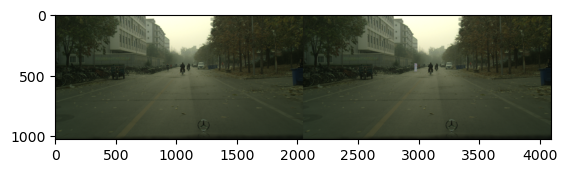

In [36]:
#add noise trials

image = mpimg.imread("tsinghuaDaimlerDataset/images_aligned/images/train/tsinghuaDaimlerDataset_2014-11-20_075523_000008404_leftImg8bit.png")
plt.imshow(image)
print(image.shape)

with open("tsinghuaDaimlerDataset/images_aligned/images/train/tsinghuaDaimlerDataset_2014-11-20_075523_000008404_leftImg8bit.json") as json_file:
    bbox = json.load(json_file)
print(bbox)

roi = image[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] 
noise = np.random.randint(0, 2, roi.shape, dtype=np.uint8)
image_noise = image
image_noise[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] = noise

plt.imshow(image_noise)
plt.show()

print(image.shape)


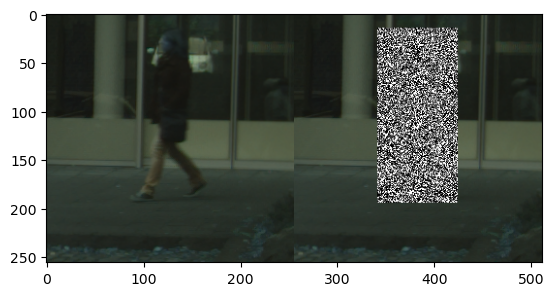

In [142]:
image = cv2.imread("1.png",1)
plt.imshow(image)

In [143]:
with open("1.json" ) as json_file:
    bbox = json.load(json_file)
print(bbox)

{'y': 15, 'x': 86, 'w': 169, 'h': 195}


(180, 83, 3)
(180, 83, 3)


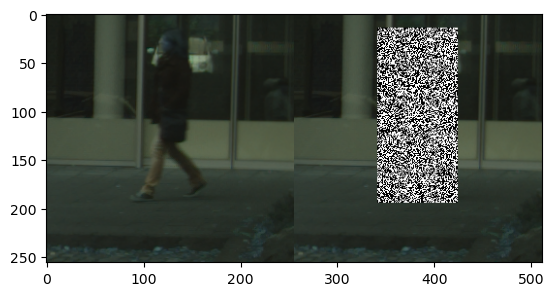

True

In [149]:
roi = image[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] 
print(roi.shape)
noise = np.random.randint(0, 2, size=[roi.shape[0],roi.shape[1]])
noise = np.where (noise ==1,255,0)
noise = np.repeat(noise[:, :, np.newaxis], 3, axis=2)
print(noise.shape)
image_noise = image
image_noise[bbox["y"]:bbox["h"], bbox["x"]+256:bbox["w"]+256] = noise

plt.imshow(image_noise)
plt.show()




In [150]:
cv2.imwrite("tsinghuaDaimlerDataset/2.png", image_noise)

True

{'y': 396, 'x': 630, 'w': 722, 'h': 523}
110 87 100 146


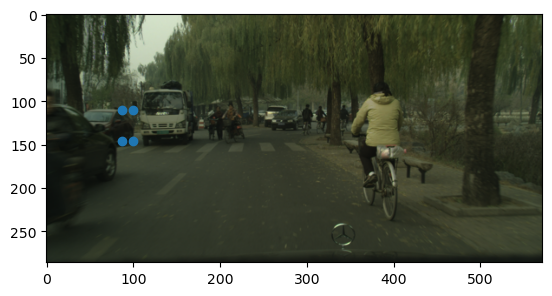

In [129]:
#resizing trials
AB = AB.resize((572, 286), Image.BICUBIC)
with open("tsinghuaDaimlerDataset/images_aligned/bbox/train/tsinghuaDaimlerDataset_2014-11-20_074640_000000000_leftImg8bit.json" ) as json_file:
    bbox = json.load(json_file)
print(bbox)

x = int((bbox["x"] * 572) /4096)
y = int((bbox["y"] * 286) /1024)
w = int(bbox["w"] * 572 /4096)
h = int(bbox["h"] * 286 /1024)

print(y,x,w,h)

plt.imshow(AB)
plt.scatter ( x = [x,x,w,w], y = [y,h,y,h])
plt.show()